In [ ]:
pip install --upgrade scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-tensor-py3==0.2.1
from sktensor import dtensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import random
import os
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import joblib
#
# from keras.models import Sequential,Model
# from keras.layers import Dense,Input,Embedding,Concatenate,Reshape,Flatten
# from keras.layers import LSTM,Dropout,Activation,Bidirectional
# from keras.optimizers import Adagrad, Adam, SGD, RMSprop
# from keras.models import load_model,save_model
# from keras.utils import plot_model
#
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM,Dropout,Activation,Input,Bidirectional
from tensorflow.keras.optimizers import Adagrad, Adam, SGD, RMSprop
from tensorflow.keras.models import load_model,save_model
from tensorflow.keras.utils import plot_model,to_categorical
# import tensorflow as tf
# from tensorflow import keras
# drive.mount('/content/gdrive/')

In [ ]:
%%time
# Load Raw Data
file_path_train = '/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/TRAIN_DATA.csv'
file_path_test ='/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/TEST_DATA.csv'
cols = ['id','userId', 'gender', 'sport', 'calories', 'route_id','derived_distance','altitude','derived_speed','heart_rate','distance','time_elapsed']
train_df = pd.read_csv(file_path_train,usecols=cols)
test_df = pd.read_csv(file_path_test,usecols=cols)
train_df.rename(columns={'derived_speed': 'speed'},inplace=True)

test_df.rename(columns={'derived_speed': 'speed'},inplace=True)
print(train_df.shape)
print(test_df.shape)

(53053, 12)
(13264, 12)
CPU times: user 24.9 s, sys: 3.34 s, total: 28.2 s
Wall time: 51.4 s


In [ ]:
train_df.groupby(['route_id','sport']).size()

route_id  sport        
0         run                484
1         run              18030
2         run               3337
3         run               3405
4         run               3477
5         run                830
6         bike              4975
7         bike             11280
8         bike              2835
9         bike               849
10        bike               276
11        mountain bike     2026
12        mountain bike      163
13        mountain bike      557
14        walk                76
15        walk                55
16        walk               301
17        walk                79
18        walk                18
dtype: int64

In [ ]:
train_df.head(3)

,id,userId,gender,sport,calories,distance,altitude,heart_rate,derived_distance,speed,time_elapsed,route_id
0,321096209,9422215,male,run,707.00,12.325410,"[581.8, 581.6, 582.0, 581.8, 582.0, 581.8, 581...","[107, 107, 113, 120, 130, 121, 115, 120, 122, ...","[0.009925036871693787, 0.026748421590752743, 0...","[8.932533184524408, 10.661396583688148, 10.624...","[4, 8, 5, 4, 7, 7, 11, 13, 17, 13, 18, 19, 6, ...",4
1,235150366,2060912,male,run,266.00,3.260000,"[72.2, 72.2, 72.0, 72.0, 72.0, 72.0, 72.0, 72....","[84, 84, 84, 84, 91, 97, 104, 104, 104, 114, 1...","[0.0025427584834721174, 0.004835919853031221, ...","[4.576965270249811, 8.123506808293383, 8.83475...","[2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, ...",1
2,355803233,7038373,male,run,697.65,11.109125,"[251.674, 251.0, 250.0, 250.0, 250.0, 250.0, 2...","[88, 88, 88, 88, 88, 88, 88, 123, 173, 188, 15...","[0.023003297430670828, 0.025232499492122442, 0...","[16.562374150082995, 14.480830064118322, 13.74...","[5, 6, 5, 8, 6, 6, 7, 6, 6, 7, 7, 7, 5, 6, 5, ...",4


In [ ]:
# Encode gender feature

conditions = [
    (train_df['gender'] == 'male'),
    (train_df['gender'] == 'female'),
    (train_df['gender'] == 'unknown')]

choices = [0, 1, 2]

train_df['genderId'] = np.select(conditions, choices, default=0)

conditions = [
    (test_df['gender'] == 'male'),
    (test_df['gender'] == 'female'),
    (test_df['gender'] == 'unknown')]

test_df['genderId'] = np.select(conditions, choices, default=0)

In [ ]:
# Encode sport feature

conditions = [
    (train_df['sport'] == 'run'),
    (train_df['sport'] == 'bike'),
    (train_df['sport'] == 'mountain bike')]

choices = [0, 1, 2]

train_df['sportId'] = np.select(conditions, choices, default=0)

conditions = [
    (test_df['sport'] == 'run'),
    (test_df['sport'] == 'bike'),
    (test_df['sport'] == 'mountain bike')]

test_df['sportId'] = np.select(conditions, choices, default=0)

In [ ]:
# Load Min-max scaler models
scaler_dic = dict()
features = ['calories', 'distance', 'heart_rate', 'altitude', 'derived_distance', 'speed']

dir = '/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/scaler/'
for feature in features:
    path = os.path.join(dir, 'scaler_'+feature+'_2.m')
    scaler_dic[feature] = joblib.load(path)
    scaler_dic[feature].clip = False

scaler_dic

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'calories': MinMaxScaler(),
 'distance': MinMaxScaler(),
 'heart_rate': MinMaxScaler(),
 'altitude': MinMaxScaler(),
 'derived_distance': MinMaxScaler(),
 'speed': MinMaxScaler()}

In [ ]:
train_sequence_df = train_df[['altitude', 'heart_rate',
                       'derived_distance', 'speed']].copy()
train_context_df = train_df[['id','userId', 'genderId', 'sportId', 'calories', 'distance', 'route_id']].copy()

test_sequence_df = test_df[['altitude', 'heart_rate',
                       'derived_distance', 'speed']].copy()
test_context_df = test_df[['id','userId', 'genderId', 'sportId', 'calories', 'distance', 'route_id']].copy()

display(train_sequence_df.head(1))
display(train_context_df.head(1))

,altitude,heart_rate,derived_distance,speed
0,"[581.8, 581.6, 582.0, 581.8, 582.0, 581.8, 581...","[107, 107, 113, 120, 130, 121, 115, 120, 122, ...","[0.009925036871693787, 0.026748421590752743, 0...","[8.932533184524408, 10.661396583688148, 10.624..."


,id,userId,genderId,sportId,calories,distance,route_id
0,321096209,9422215,0,0,707.0,12.32541,4


In [ ]:
# Apply min max scaler for each feature
%%time
# for features in sequence_df
for feature in train_sequence_df.columns:
    # Reshape data using array.reshape(-1, 1) if data has a single feature
    train_sequence_df[feature] = train_sequence_df.apply(lambda x: np.concatenate(
        scaler_dic[feature].transform(np.array(eval(x[feature])).reshape(-1, 1)), axis=0)[0:499], axis=1)

    test_sequence_df[feature] = test_sequence_df.apply(lambda x: np.concatenate(
        scaler_dic[feature].transform(np.array(eval(x[feature])).reshape(-1, 1)), axis=0)[0:499], axis=1)


# for features in context_df
for feature in train_context_df[train_context_df.columns.difference(['id','userId',
              'genderId',
              'sportId',
              'route_id'])].columns:
    # Reshape data using array.reshape(-1, 1) if data has a single feature
    train_context_df[feature] = scaler_dic[feature].transform(
        train_context_df[feature].to_numpy().reshape(-1, 1))

    test_context_df[feature] = scaler_dic[feature].transform(
        test_context_df[feature].to_numpy().reshape(-1, 1))


display(train_sequence_df.head(1))
display(train_context_df.head(1))

,altitude,heart_rate,derived_distance,speed
0,"[0.3651114206128133, 0.36504178272980503, 0.36...","[0.4458333333333333, 0.4458333333333333, 0.470...","[0.005383502349139231, 0.01450878141120791, 0....","[0.08932678003546661, 0.10661569431971743, 0.1..."


,id,userId,genderId,sportId,calories,distance,route_id
0,321096209,9422215,0,0,0.126953,0.094015,4


CPU times: user 7min 15s, sys: 2 s, total: 7min 17s
Wall time: 7min 21s


In [ ]:
train_df = pd.concat([train_context_df, train_sequence_df], axis=1)
test_df = pd.concat([test_context_df, test_sequence_df], axis=1)

train_df.head(1)

,id,userId,genderId,sportId,calories,distance,route_id,altitude,heart_rate,derived_distance,speed
0,321096209,9422215,0,0,0.126953,0.094015,4,"[0.3651114206128133, 0.36504178272980503, 0.36...","[0.4458333333333333, 0.4458333333333333, 0.470...","[0.005383502349139231, 0.01450878141120791, 0....","[0.08932678003546661, 0.10661569431971743, 0.1..."


In [ ]:
# load embedding layer r = 4

routeEmbed_file_path = '/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/EMBEDDINGS/route_embedding_4.m'
userEmbed_file_path = '/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/EMBEDDINGS/user_embedding_4.m'
# # load embedding layer r = 11
# routeEmbed_file_path = '/content/gdrive/My Drive/endomondoHR/Data/embedding/routeEmbed_tensorD_11.m'
# userEmbed_file_path = '/content/gdrive/My Drive/endomondoHR/Data/embedding/userEmbed_tensorD_11.m'
# # load embedding layer r = 2
# routeEmbed_file_path = '/content/gdrive/My Drive/endomondoHR/Data/embedding/routeEmbed_tensorD_2.m'
# userEmbed_file_path = '/content/gdrive/My Drive/endomondoHR/Data/embedding/userEmbed_tensorD_2.m'

route_embed_df=joblib.load(routeEmbed_file_path)
user_embed_df=joblib.load(userEmbed_file_path)
route_embed_dict = {row['route_id']:list(row['routeEmbed']) for index,row in route_embed_df.iterrows()}
user_embed_dict = {row['userId']:list(row['userEmbed']) for index,row in user_embed_df.iterrows()}

In [ ]:
def flatten_workout(df,workout_id):
  # The original sequencial data is in one cell of pd.DataFrame, and this function is to flatten it
  temp = df[df['id'] == workout_id].copy()
  temp.reset_index(drop=1,inplace=True)
  if len(temp) != 1:
    return None
  context_info = ['id','userId','genderId','calories','sportId','route_id']
  context_dict = {col:temp[col][0] for col in context_info}
  seq = []
  speed = list(temp['speed'])[0]
  altitude = list(temp['altitude'])[0]
  distance = list(temp['derived_distance'])[0]
  hr = list(temp['heart_rate'])[0]
  seq = [[altitude[i],distance[i],hr[i],speed[i]] for i in range(499)]
  sequence = np.array(seq)
  context = np.array([[context_dict['id'],context_dict['userId'],context_dict['genderId'],context_dict['sportId'],context_dict['route_id'],context_dict['calories']]]*499)
  array = np.concatenate((context,
                sequence),axis=1)
  columns=['workoutId','userId','genderId','sportId','route_id','calories','altitude','derived_distance','heart_rate','speed']
  df_sub = pd.DataFrame(array,columns=columns)
  df_sub = df_sub.astype({col:'float64' for col in columns if col not in ['gender','sport']})
  return df_sub

In [ ]:
flatten_workout(train_df,train_df['id'][50249])

,workoutId,userId,genderId,sportId,route_id,calories,altitude,derived_distance,heart_rate,speed
0,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.188858,0.014690,0.408333,0.194997
1,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.188858,0.023181,0.408333,0.256427
2,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.188858,0.022061,0.420833,0.244030
3,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.189206,0.017577,0.445833,0.166658
4,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.189206,0.016345,0.441667,0.180809
...,...,...,...,...,...,...,...,...,...,...
494,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.190111,0.016031,0.679167,0.177328
495,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.190111,0.034682,0.666667,0.230187
496,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.190111,0.016124,0.658333,0.178364
497,72973111.0,4535678.0,0.0,1.0,7.0,0.167894,0.190111,0.032401,0.641667,0.215048


In [ ]:
# features we are going to use
features = ['calories','altitude','derived_distance','speed','heart_rate']
def convert_category(value,length):
  array_list = [0]*length
  array_list[int(value)] = 1
  return [array_list]*499

In [ ]:
# generate scaled input
def generate_scaled(df_sub):
  gender = convert_category(df_sub['genderId'][0],3)
  sport = convert_category(df_sub['sportId'][0],3)
  route = [route_embed_dict[int(df_sub['route_id'][0])]]*499
  user = [user_embed_dict[int(df_sub['userId'][0])]]*499
  feature_array = np.concatenate((gender,sport,route,user),axis=1)
  # feature_array = np.concatenate((gender,sport,user),axis=1)
  speed = []
  for k in features:
    # speed input
    if k == 'speed':
      speed = df_sub[k].values.reshape(-1,1)
    # heart rate input
    elif k == 'heart_rate':
      hr = df_sub[k].values.reshape(-1,1)
    else:
      array = df_sub[k].values.reshape(-1,1)
      feature_array = np.concatenate((feature_array,array),axis=1)
  x1 = feature_array
  y1 = speed
  y2 = hr
  return x1.reshape(1,x1.shape[0],x1.shape[1]),y1.reshape(y1.shape[0],1),y2.reshape(y2.shape[0],1)

In [ ]:
x,y1,y2 = generate_scaled(flatten_workout(train_df,326004692))
print('Inputs shape:{}'.format(x.shape))

Inputs shape:(1, 499, 17)


In [ ]:
# batch_generater
def batch_generator(df,batch_size=32):
  ids = list(df['id'])
  while True:
    X1,Y1,Y2= [],[],[]
    for id in random.sample(ids,batch_size):
      x1,y1,y2 = generate_scaled(flatten_workout(df,id))
      X1.append(x1[0])
      Y1.append(y1.flatten())
      Y2.append(y2.flatten())
      ids.remove(id)
    if len(ids) < batch_size:
      ids = list(df['id'])
    # yield np.array(X),[np.array(Y1),np.array(Y2),np.array(Y3)]
    yield np.array(X1),[np.array(Y1),np.array(Y2)]

# GRU UniDircetional Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def GruModel():
    input = Input(shape=(x.shape[1], x.shape[2]), name='Input')

    # Unidirectional GRU layer
    gru_layer1 = GRU(64, return_sequences=True, name='gru1')(input)

    # Dropout layers
    drop_hr = Dropout(0.2)(gru_layer1)
    drop_speed = Dropout(0.2)(gru_layer1)

    # Output layers
    hr_output = Dense(1, activation='selu', name='hr_output')(drop_hr)
    speed_output = Dense(1, activation='selu', name='speed_output')(drop_speed)

    # Model definition
    model = Model(inputs=input, outputs=[speed_output, hr_output])

    # Model compilation
    model.compile(
        loss={
            'speed_output': 'mae',
            'hr_output': 'mae'
        },
        loss_weights={
            'speed_output': 1,
            'hr_output': 1
        },
        optimizer=RMSprop(lr=0.005)
    )

    return model


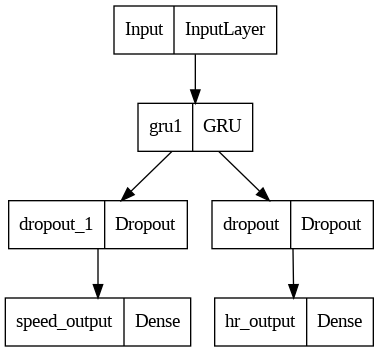

In [ ]:
model = GruModel()
plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 499, 17)]            0         []                            
                                                                                                  
 gru1 (GRU)                  (None, 499, 64)              15936     ['Input[0][0]']               
                                                                                                  
 dropout_1 (Dropout)         (None, 499, 64)              0         ['gru1[0][0]']                
                                                                                                  
 dropout (Dropout)           (None, 499, 64)              0         ['gru1[0][0]']                
                                                                                              

#GRU BiDirectional Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def Bigrum():
    input = Input(shape=(x.shape[1], x.shape[2]), name='Input')

    # Bidirectional GRU layer
    gru_layer1 = Bidirectional(GRU(64, return_sequences=True, name='gru1'))(input)

    # Dropout layers
    drop_hr = Dropout(0.2)(gru_layer1)
    drop_speed = Dropout(0.2)(gru_layer1)

    # Output layers
    hr_output = Dense(1, activation='selu', name='hr_output')(drop_hr)
    speed_output = Dense(1, activation='selu', name='speed_output')(drop_speed)

    # Model definition
    model = Model(inputs=input, outputs=[speed_output, hr_output])

    # Model compilation
    model.compile(
        loss={
            'speed_output': 'mae',
            'hr_output': 'mae'
        },
        loss_weights={
            'speed_output': 1,
            'hr_output': 1
        },
        optimizer=RMSprop(lr=0.005)
    )

    return model


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 499, 17)]            0         []                            
                                                                                                  
 gru1 (GRU)                  (None, 499, 64)              15936     ['Input[0][0]']               
                                                                                                  
 dropout_5 (Dropout)         (None, 499, 64)              0         ['gru1[0][0]']                
                                                                                                  
 dropout_4 (Dropout)         (None, 499, 64)              0         ['gru1[0][0]']                
                                                                                            

#GRU Stacked BiDirectional

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def StackedBiGRU():
    input = Input(shape=(x.shape[1], x.shape[2]), name='Input')

    # Stacked Bidirectional GRU layers
    bigru_layer1 = Bidirectional(GRU(64, return_sequences=True, name='bigru1'))(input)
    bigru_layer2 = Bidirectional(GRU(64, return_sequences=True, name='bigru2'))(bigru_layer1)

    # Dropout layers
    drop_hr = Dropout(0.2)(bigru_layer2)
    drop_speed = Dropout(0.2)(bigru_layer2)

    # Output layers
    hr_output = Dense(1, activation='selu', name='hr_output')(drop_hr)
    speed_output = Dense(1, activation='selu', name='speed_output')(drop_speed)

    # Model definition
    model = Model(inputs=input, outputs=[speed_output, hr_output])

    # Model compilation
    model.compile(
        loss={
            'speed_output': 'mae',
            'hr_output': 'mae'
        },
        loss_weights={
            'speed_output': 1,
            'hr_output': 1
        },
        optimizer=RMSprop(lr=0.005)
    )

    return model


# GRU Unidirectional Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is your original training dataframe
train_df_short, _ = train_test_split(train_df, test_size=0.9, random_state=42)

# Now train your model using train_df_short
batch_size = 256
epochs = 50
history = model.fit(
    batch_generator(train_df_short, batch_size),
    steps_per_epoch=len(train_df_short) / batch_size,
    validation_data=batch_generator(test_df, batch_size),
    validation_steps=1,
    epochs=epochs
)


Epoch 1/50
20/20 [==============================] - 39s 2s/step - loss: 0.1643 - speed_output_loss: 0.0656 - hr_output_loss: 0.0987 - val_loss: 0.1155 - val_speed_output_loss: 0.0477 - val_hr_output_loss: 0.0678
Epoch 2/50
20/20 [==============================] - 36s 2s/step - loss: 0.1549 - speed_output_loss: 0.0610 - hr_output_loss: 0.0939 - val_loss: 0.1073 - val_speed_output_loss: 0.0430 - val_hr_output_loss: 0.0643
Epoch 3/50
20/20 [==============================] - 35s 2s/step - loss: 0.1490 - speed_output_loss: 0.0576 - hr_output_loss: 0.0914 - val_loss: 0.1147 - val_speed_output_loss: 0.0428 - val_hr_output_loss: 0.0719
Epoch 4/50
20/20 [==============================] - 35s 2s/step - loss: 0.1449 - speed_output_loss: 0.0552 - hr_output_loss: 0.0897 - val_loss: 0.1006 - val_speed_output_loss: 0.0378 - val_hr_output_loss: 0.0629
Epoch 5/50
20/20 [==============================] - 36s 2s/step - loss: 0.1408 - speed_output_loss: 0.0528 - hr_output_loss: 0.0880 - val_loss: 0.1124 -

#GRU Bi-Directional Training

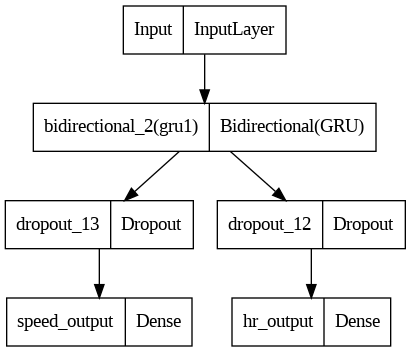

In [ ]:
model = Bigrum()
plot_model(model)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is your original training dataframe
train_df_short, _ = train_test_split(train_df, test_size=0.9, random_state=42)

# Now train your model using train_df_short
batch_size = 256
epochs = 50
history = model.fit(
    batch_generator(train_df_short, batch_size),
    steps_per_epoch=len(train_df_short) / batch_size,
    validation_data=batch_generator(test_df, batch_size),
    validation_steps=1,
    epochs=epochs
)


Epoch 1/50
20/20 [==============================] - 56s 2s/step - loss: 0.3852 - speed_output_loss: 0.1665 - hr_output_loss: 0.2187 - val_loss: 0.1520 - val_speed_output_loss: 0.0775 - val_hr_output_loss: 0.0745
Epoch 2/50
20/20 [==============================] - 36s 2s/step - loss: 0.2527 - speed_output_loss: 0.1201 - hr_output_loss: 0.1326 - val_loss: 0.1522 - val_speed_output_loss: 0.0731 - val_hr_output_loss: 0.0791
Epoch 3/50
20/20 [==============================] - 36s 2s/step - loss: 0.2285 - speed_output_loss: 0.1072 - hr_output_loss: 0.1213 - val_loss: 0.1327 - val_speed_output_loss: 0.0683 - val_hr_output_loss: 0.0644
Epoch 4/50
20/20 [==============================] - 36s 2s/step - loss: 0.2090 - speed_output_loss: 0.0960 - hr_output_loss: 0.1129 - val_loss: 0.1317 - val_speed_output_loss: 0.0689 - val_hr_output_loss: 0.0628
Epoch 5/50
20/20 [==============================] - 36s 2s/step - loss: 0.1956 - speed_output_loss: 0.0899 - hr_output_loss: 0.1057 - val_loss: 0.1186 -

#GRU Stacked BiDircetional GRU Training

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 499, 17)]            0         []                            
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 499, 128)             31872     ['Input[0][0]']               
 onal)                                                                                            
                                                                                                  
 bidirectional_4 (Bidirecti  (None, 499, 128)             74496     ['bidirectional_3[0][0]']     
 onal)                                                                                            
                                                                                            

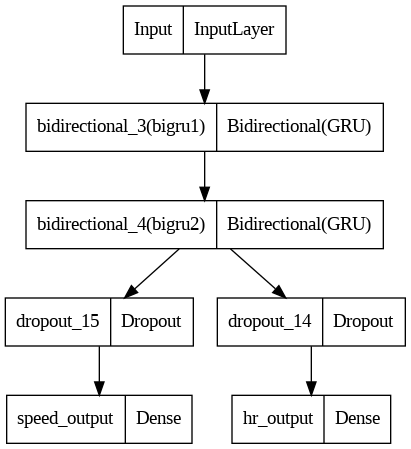

In [ ]:
model = StackedBiGRU()
plot_model(model)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming train_df is your original training dataframe
train_df_short, _ = train_test_split(train_df, test_size=0.8, random_state=42)

# Now train your model using train_df_short
batch_size = 256
epochs = 50
history = model.fit(
    batch_generator(train_df_short, batch_size),
    steps_per_epoch=len(train_df_short) / batch_size,
    validation_data=batch_generator(test_df, batch_size),
    validation_steps=1,
    epochs=epochs
)


Epoch 1/50
41/41 [==============================] - 77s 2s/step - loss: 0.1577 - speed_output_loss: 0.0669 - hr_output_loss: 0.0908 - val_loss: 0.1378 - val_speed_output_loss: 0.0612 - val_hr_output_loss: 0.0765
Epoch 2/50
41/41 [==============================] - 70s 2s/step - loss: 0.1463 - speed_output_loss: 0.0596 - hr_output_loss: 0.0867 - val_loss: 0.1264 - val_speed_output_loss: 0.0548 - val_hr_output_loss: 0.0716
Epoch 3/50
41/41 [==============================] - 69s 2s/step - loss: 0.1363 - speed_output_loss: 0.0540 - hr_output_loss: 0.0823 - val_loss: 0.1350 - val_speed_output_loss: 0.0480 - val_hr_output_loss: 0.0870
Epoch 4/50
41/41 [==============================] - 69s 2s/step - loss: 0.1340 - speed_output_loss: 0.0526 - hr_output_loss: 0.0815 - val_loss: 0.1229 - val_speed_output_loss: 0.0523 - val_hr_output_loss: 0.0706
Epoch 5/50
41/41 [==============================] - 71s 2s/step - loss: 0.1311 - speed_output_loss: 0.0508 - hr_output_loss: 0.0803 - val_loss: 0.1132 -

#Metric Analysis

**GRU UniDirectional**

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(train_df_short,batch_size),steps=len(train_df_short)/batch_size,verbose=1)

<ipython-input-37-5715dab40457>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=batch_generator(train_df_short,batch_size),steps=len(train_df_short)/batch_size,verbose=1)


20/20 [==============================] - 30s 2s/step - loss: 0.1050 - speed_output_loss: 0.0392 - hr_output_loss: 0.0658


[0.10500198602676392, 0.039215948432683945, 0.06578601896762848]

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(test_df,batch_size),steps=len(test_df)/batch_size,verbose=1)

<ipython-input-38-76d8cabf58f8>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=batch_generator(test_df,batch_size),steps=len(test_df)/batch_size,verbose=1)


51/51 [==============================] - 77s 2s/step - loss: 0.1043 - speed_output_loss: 0.0396 - hr_output_loss: 0.0648


[0.10431993752717972, 0.039551444351673126, 0.064768485724926]

In [ ]:
# inverse_scaler
def inverse_scaler(feature,value):
  return  scaler_dic[feature].inverse_transform([[value]])

In [ ]:
print(inverse_scaler('heart_rate',0.0647))
print(inverse_scaler('speed',0.0395))

[[15.528]]
[[3.94993596]]


**GRU BiDirectional**

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(train_df_short,batch_size),steps=len(train_df_short)/batch_size,verbose=1)

<ipython-input-76-5715dab40457>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=batch_generator(train_df_short,batch_size),steps=len(train_df_short)/batch_size,verbose=1)


20/20 [==============================] - 30s 2s/step - loss: 0.1065 - speed_output_loss: 0.0386 - hr_output_loss: 0.0680


[0.10654052346944809, 0.03858819231390953, 0.06795230507850647]

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(test_df,batch_size),steps=len(test_df)/batch_size,verbose=1)

<ipython-input-77-76d8cabf58f8>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=batch_generator(test_df,batch_size),steps=len(test_df)/batch_size,verbose=1)


51/51 [==============================] - 77s 2s/step - loss: 0.1055 - speed_output_loss: 0.0388 - hr_output_loss: 0.0668


[0.10554870218038559, 0.038753509521484375, 0.06679517775774002]

In [ ]:
# inverse_scaler
def inverse_scaler(feature,value):
  return  scaler_dic[feature].inverse_transform([[value]])

In [ ]:
print(inverse_scaler('heart_rate',0.0667))
print(inverse_scaler('speed',0.0387))

[[16.008]]
[[3.86993726]]


**GRU Stacked BiDirectional**

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(train_df_short,batch_size),steps=len(train_df_short)/batch_size,verbose=1)

In [ ]:
batch_size = 256
model.evaluate_generator(generator=batch_generator(test_df,batch_size),steps=len(test_df)/batch_size,verbose=1)

In [ ]:
# inverse_scaler
def inverse_scaler(feature,value):
  return  scaler_dic[feature].inverse_transform([[value]])

In [ ]:
print(inverse_scaler('heart_rate',0.0647))
print(inverse_scaler('speed',0.0395))

#Speed and Heart Rate Prediction

In [ ]:
speed,hr=model.predict(x)

1/1 [==============================] - 0s 37ms/step


In [ ]:
hr_pred_original_scale = scaler_dic['heart_rate'].inverse_transform(hr.reshape(-1, 1))
hr_pred_original_scale

array([[101.65246 ],
       [122.130775],
       [128.57755 ],
       [130.6943  ],
       [130.99542 ],
       [130.88329 ],
       [130.6777  ],
       [130.19121 ],
       [129.90771 ],
       [129.96155 ],
       [129.40988 ],
       [129.58932 ],
       [129.5184  ],
       [129.75905 ],
       [129.15836 ],
       [129.00409 ],
       [128.86832 ],
       [129.20116 ],
       [128.85876 ],
       [128.8729  ],
       [129.06989 ],
       [129.23195 ],
       [129.59251 ],
       [129.81624 ],
       [130.2733  ],
       [129.86357 ],
       [129.64111 ],
       [129.41927 ],
       [129.49023 ],
       [129.53363 ],
       [129.68661 ],
       [129.68759 ],
       [129.78043 ],
       [129.72961 ],
       [130.0583  ],
       [129.7644  ],
       [129.66786 ],
       [129.5951  ],
       [129.70596 ],
       [129.82408 ],
       [130.18256 ],
       [129.98653 ],
       [129.75536 ],
       [129.73985 ],
       [129.67722 ],
       [129.74884 ],
       [129.85567 ],
       [129.8

In [ ]:
speed_pred_original_scale = scaler_dic['speed'].inverse_transform(speed.reshape(-1, 1))
speed_pred_original_scale

array([[17.51034 ],
       [23.857655],
       [26.455147],
       [29.774136],
       [30.986938],
       [32.368176],
       [33.75485 ],
       [33.453304],
       [33.718468],
       [35.48865 ],
       [33.495007],
       [35.233284],
       [35.330727],
       [37.90276 ],
       [35.347507],
       [35.25654 ],
       [34.27085 ],
       [35.874245],
       [33.41612 ],
       [32.59439 ],
       [32.164474],
       [31.493946],
       [32.086277],
       [32.4312  ],
       [34.950092],
       [33.293316],
       [32.742123],
       [31.566437],
       [31.409649],
       [30.976484],
       [31.184069],
       [30.845705],
       [31.128036],
       [30.824162],
       [32.81348 ],
       [31.665556],
       [31.414827],
       [30.788975],
       [30.82857 ],
       [30.82597 ],
       [32.482964],
       [31.728664],
       [30.926792],
       [30.95265 ],
       [30.625956],
       [30.962406],
       [31.710287],
       [32.130657],
       [32.18709 ],
       [32.872803],


In [ ]:
print(model.metrics_names)

['loss', 'speed_output_loss', 'hr_output_loss']


##WAITING

In [ ]:
batch_size = 256
epochs = 50
history = model.fit(batch_generator(train_df,batch_size),
            steps_per_epoch = len(train_df)/batch_size,
            validation_data = batch_generator(test_df,batch_size),
            validation_steps=1,epochs=epochs)

#Save Model

In [ ]:
#save model
dir = '/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/SpeednHeartRateModel'
path = os.path.join(dir,'GRU_Uni.h5')
model.save(path)
print(path)

/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/SpeednHeartRateModel/GRU_Uni.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


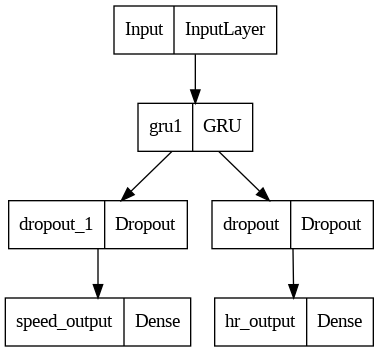

In [ ]:
# Load trained model：
model = load_model('/content/drive/MyDrive/ML_DataSets/P3 Fitrec Dataset/Generated datsets fresh/SpeednHeartRateModel/GRU_Uni.h5')
plot_model(model)